<a href="https://colab.research.google.com/github/T-Sawao/diveintocode-ml3/blob/main/tram2_Sprint19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# tram2_Sprint19 セグメンテーション１

### 0.1.1 （準備）　**Tensorflow2.2.0のインポート**

python 3.7.x
keras 2.2.x
tensorflow 1系：1.14.x、2系：2.0
pytorch 1.2.x

In [1]:
!pip install keras==2.2.4

     |████████████████████████████████| 317kB 13.4MB/s 
     |████████████████████████████████| 51kB 9.7MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [2]:
!pip install tensorflow==1.14.0

     |████████████████████████████████| 109.2MB 95kB/s 
     |████████████████████████████████| 3.2MB 50.8MB/s 
     |████████████████████████████████| 491kB 54.8MB/s 
  Found existing installation: tensorboard 2.4.0
    Uninstalling tensorboard-2.4.0:
      Successfully uninstalled tensorboard-2.4.0
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorflow 2.4.0
    Uninstalling tensorflow-2.4.0:
      Successfully uninstalled tensorflow-2.4.0


In [3]:
import tensorflow

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [4]:
tensorflow.__version__

'1.14.0'

### 0.1.2 （準備）　**kaggleとMyドライブの接続と、データセットのダウンロード**

In [5]:
# kaggleインポート
!pip install kaggle

In [6]:
# 自分のマイドライブにマウントする
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [7]:
mkdir .kaggle

In [8]:
ls -a

./  ../  .config/  drive/  .kaggle/  sample_data/


In [9]:
# chmodはファイル or ディレクトリに対する権限を設定するコマンド。
# 形式：chmod 権限設定　ファイルパス
!chmod 600 /content/.kaggle/kaggle.json
      #--------
      # kaggleの権限設定は、kaggleの"My Account" 内のAPIにあるRead the docsから移動した、
      # kaggle-api内のAPI credentialsに「chmod 600 ~/.kaggle/kaggle.json」と記載あり。

chmod: cannot access '/content/.kaggle/kaggle.json': No such file or directory


kaggle.jsonファイルのダウンロード  
※JSON (JavaScript Object Notation)は、軽量のデータ交換フォーマット

In [10]:
# https://www.kaggle.com/　へアクセスし、ログイン後に右上のプロフィール画像をクリック、さらに"My Account"をクリックする
# このサイトの「API」項目にある"Create New API Token"をクリックすると、kaggle.jsonファイルが自動的にダウンロードされる
# ローカルで、kaggle.json（ダウンロードフォルダにあるはず）をエディターで開く。
# このセルの以下のコードにある token = {'username':'***','key':'***'} における「***」部分を、
# ダウンロードしたkaggle.jsonを参照して書き換え、このセルを実行する

import json

token = {"username":"toshihirosawao","key":"f57d7a0bbe0ad850c3f9e03332f544f2"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [11]:
ls -a .kaggle

./  ../  kaggle.json


In [12]:
mkdir　/root/.kaggle/

In [13]:
# kaggle.jsonフォルダをroot/.kaggle内にコピー
!cp -R /content/.kaggle/kaggle.json /root/.kaggle/

In [14]:
!ls -a /root/.kaggle/

.  ..  kaggle.json


In [15]:
# kaggle APIコマンドが使えるかどうかを確認
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         88           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        186           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        316           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2355           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      18081           False  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       4896            True  
connectx

In [16]:
# カレントディレクトリの変更

import os

os.chdir('/content/drive/My Drive/')

# カレントディレクトリの取得
print(os.getcwd())

/content/drive/My Drive


In [17]:
# simpsonデータセットのAPIコマンドでデータセットをダウンロードする
# APIコマンドはこちらのサイトを参照。https://www.kaggle.com/alexattia/the-simpsons-characters-dataset

!kaggle competitions download -c tgs-salt-identification-challenge

train.zip: Skipping, found more recently modified local copy (use --force to force download)
competition_data.zip: Skipping, found more recently modified local copy (use --force to force download)
flamingo.zip: Skipping, found more recently modified local copy (use --force to force download)
depths.csv: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Simpsonsデータセットのダウンロード 
!unzip /content/drive/MyDrive/competition_data.zip

### 0.1.3 （準備）　**github上のコードをダウンロード**

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
!git clone https://github.com/zhixuhao/unet.git

fatal: destination path 'unet' already exists and is not an empty directory.


In [21]:
mv /content/drive/MyDrive/competition_data unet/

In [22]:
cd /content/drive/MyDrive/unet

/content/drive/MyDrive/unet


# 1.このSprintについて

**Sprintの目的**  
コンピュータビジョンの代表的タスクであるセグメンテーションを学ぶ

**どのように学ぶか**  
公開されている実装を用いてKaggleコンペティションのデータでセグメンテーションを行います。

# 2.セグメンテーション

KaggleのTGS Salt Identification Challengeのデータセットを使用し、セグメンテーションを行います。


TGS Salt Identification Challenge | Kaggle  
https://www.kaggle.com/c/tgs-salt-identification-challenge


セグメンテーション手法としてU-Net[1]を使います。


[1]O.Ronneberger, P.Fischer, T.Brox. U-Net: Convolutional Networks for Biomedical Image Segmentation. Medical Image Computing and Computer-Assisted Intervention (MICCAI), Springer, LNCS, Vol.9351: 234–241, 2015


https://arxiv.org/pdf/1505.04597.pdf

## 【問題1】学習・推定
以下のKeras実装を使用して学習・推定を行ってください。


zhixuhao/unet: unet for image segmentation  
https://github.com/zhixuhao/unet


**《GPU環境での学習》**


大規模なデータセット、大きなモデルになるため、GPUを使用する必要があります。


**《新たなデータセットの適用》**


公開されている実装で用意されたものとは異なるデータセットを入力するための準備が必要です。

### 1.1.1（学習）

In [42]:
pwd

'/content/drive/MyDrive/unet'

In [45]:
from model import *
from data import *

#os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# 拡張データの作成
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'competition_data/train','images','masks',data_gen_args,save_to_dir = None)

In [46]:
model = unet()
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=3,epochs=2,callbacks=[model_checkpoint])

/content/drive/My Drive/unet/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


Epoch 1/2
Found 4000 images belonging to 1 classes.
Found 4000 images belonging to 1 classes.
3/3 [==============================] - 43s 14s/step - loss: 0.4182 - acc: 0.9801

Epoch 00001: loss improved from inf to 0.41817, saving model to unet_membrane.hdf5
Epoch 2/2
3/3 [==============================] - 37s 12s/step - loss: 1.7609 - acc: 0.7186

Epoch 00002: loss did not improve from 0.41817


In [55]:
testGene = testGenerator("competition_data/test/images")
model = unet()
model.load_weights("unet_membrane.hdf5")
results = model.predict_generator(testGene,4,verbose=1)
saveResult("competition_data/test/result",results)

/content/drive/My Drive/unet/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


4/4 [==============================] - 7s 2s/step


/content/drive/My Drive/unet/data.py:124: UserWarning: competition_data/test/result/0_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
/content/drive/My Drive/unet/data.py:124: UserWarning: competition_data/test/result/1_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
/content/drive/My Drive/unet/data.py:124: UserWarning: competition_data/test/result/2_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
/content/drive/My Drive/unet/data.py:124: UserWarning: competition_data/test/result/3_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)


# <font color="Crimson"></font>

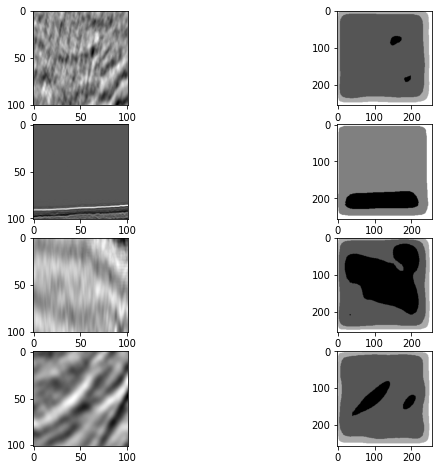

In [63]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

path1 = "competition_data/test/images/"
path2 = "competition_data/test/result/"
image_path_list=[path1+'0.png', path2+'0_predict.png',
                 path1+'1.png', path2+'1_predict.png',
                 path1+'2.png', path2+'2_predict.png',
                 path1+'3.png', path2+'3_predict.png',
                ]

plt.figure(figsize=(10,8))
for i,d in enumerate(image_path_list):
    plt.subplot(4,2,i+1)
    plt.imshow(mpimg.imread(d),cmap="gray")

## 【問題2】コードリーディング
論文[1]に目を通した上で、上記実装のコードリーディングを行ってください。

### 2.1.1（解答）

- model.pyのuneｔメソッドでunetを実装している。
- conv1からconv5が畳み込みを行い、conv6からconv10までがskip-conectionからの情報をもとに逆畳み込みをおこなている。